In [1]:
#run with python2
import numpy as np
import astroplan
from astroplan.plots import plot_sky
from astroplan import plots, Observer, FixedTarget
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.table import Table
from matplotlib import cycler
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_moon

#%matplotlib 

# Plan

In [2]:
astroplan.download_IERS_A()

In [3]:
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler= cycler(linestyle=['-', '--'])*cycler(color=colors)
#plt.rcParams['axes.prop_cycle'] = custom_cycler
#plt.rc('axes', prop_cycle=custom_cycler)

custom_cycler

'#1f77b4','-'
'#ff7f0e','-'
'#2ca02c','-'
'#d62728','-'
'#9467bd','-'
'#8c564b','-'
'#e377c2','-'
'#7f7f7f','-'
'#bcbd22','-'
'#17becf','-'
'#1f77b4','--'


In [4]:
observer = astroplan.Observer.at_site('keck')


In [5]:
today = Time('2022-03-13 04:20:00', scale='utc')


In [11]:
twi12deg = observer.twilight_morning_nautical(today)
#twi12deg = Time('2019-12-22 16:00:30.559', scale='utc')
print('12 deg morn twilight', twi12deg.iso)


twi18deg = observer.twilight_morning_astronomical(today)
print('18 deg morn twilight', twi18deg.iso)

pre_twi18deg = observer.twilight_evening_astronomical(today)
print('18 deg eve twilight', pre_twi18deg.iso)

twi15deg = observer.sun_rise_time(today, horizon=-15*u.degree)
print('15 deg morn twilight', twi15deg.iso)

pre_twi15deg = observer.sun_set_time(today, horizon=-15*u.degree)
print('15 deg morn twilight', pre_twi15deg.iso)



handoff = Time('2022-03-13 10:31:00', scale='utc')

12 deg morn twilight 2022-03-13 15:44:17.642
18 deg morn twilight 2022-03-13 15:18:46.193
18 deg eve twilight 2022-03-13 05:43:47.792
15 deg morn twilight 2022-03-13 15:31:32.223
15 deg morn twilight 2022-03-13 05:31:01.254


In [12]:
pre_twi12deg = observer.sun_set_time(today, horizon=-12*u.degree)
print('12 deg morn twilight', pre_twi12deg.iso)

12 deg morn twilight 2022-03-13 05:18:15.304


#### Standards

In [47]:
gd71           =astroplan.FixedTarget(coord=SkyCoord('05:52:27.51', '+15:53:16.6', unit=(u.hourangle, u.degree)),
                                      name='gd71')
BD284211       =astroplan.FixedTarget(coord=SkyCoord('21:51:11.02',  '+28:51:50.4',unit=(u.hourangle, u.degree)),
                                      name='BD284211')#30 s	R~10.7	blue standard  (sdOp)
BD174708       =astroplan.FixedTarget(coord=SkyCoord('22:11:31.37',  '+18:05:34.2',unit=(u.hourangle, u.degree)),
                                      name='BD174708')#10 s	R~9.2	red standard
HD19445        =astroplan.FixedTarget(coord=SkyCoord('03:08:25.86',  '+26:20:05.7',unit=(u.hourangle, u.degree)),
                                      name='HD19445')#10 s	R~7.8	red standard
G191B2B        =astroplan.FixedTarget(coord=SkyCoord('05:05:30.60',  '+52:49:54.0',unit=(u.hourangle, u.degree)),
                                      name='G191B2B')#60 s	R~11.9	blue standard (DA0)
HD84937        =astroplan.FixedTarget(coord=SkyCoord('09:48:56.09',  '+13:44:39.3',unit=(u.hourangle, u.degree)),
                                      name='HD84937')#10 s	V~8.3	red standard
Feige34        =astroplan.FixedTarget(coord=SkyCoord('10:39:36.74',  '+43:06:09.3',unit=(u.hourangle, u.degree)),
                                      name='Feige34')#60 s	V~11.3	blue standard (DO)
HZ44           =astroplan.FixedTarget(coord=SkyCoord('13:23:35.26',  '+36:07:59.5',unit=(u.hourangle, u.degree)),
                                      name='HZ44')#60 s	V~11.7	blue standard
BD262606       =astroplan.FixedTarget(coord=SkyCoord('14:49:02.35',  '+25:42:09.1',unit=(u.hourangle, u.degree)),
                                      name='BD262606')#20 s	V~9.7	red standard
BD33d2642      =astroplan.FixedTarget(coord=SkyCoord('15:51:59.86',  '+32:56:54.8',unit=(u.hourangle, u.degree)),
                                      name='BD33d2642')#30 s	V~10.81	(B2IV)
Feige110       =astroplan.FixedTarget(coord=SkyCoord('23:19:58.39',  '-05:09:55.8',unit=(u.hourangle, u.degree)),
                                      name='Feige110')#60 s	V~11.83	(DOp)
Feige66       = astroplan.FixedTarget(coord=SkyCoord('12:37:23.6',  '+25:04:00',unit=(u.hourangle, u.degree)),
                                      name='Feige66')#	V~10.5	(sdO)

HZ4           = astroplan.FixedTarget(coord=SkyCoord('03:55:21.7','+09:47:18',unit=(u.hourangle, u.degree)),
                                      name='HZ4')#	DA4	14.52	3850	8850	1,3
PG0205134     = astroplan.FixedTarget(coord=SkyCoord('02:08:03.44', '+13:36:30.9',unit=(u.hourangle, u.degree)),
                                      name='PG0205134')#	sdOB	14.87	3200	8100	5

Feige11       = astroplan.FixedTarget(coord=SkyCoord('01:04:21.6', '+04:13:37',unit=(u.hourangle, u.degree)),
                                      name='Feige11')#	sdB	12.07	3850	8850	3

Hiltner600    = astroplan.FixedTarget(coord=SkyCoord('06:45:13.40', '+02:08:14.1',unit=(u.hourangle, u.degree)),
                                      name='Hiltner600')#	B1V	10.45	3200	10300	5, 6, 2
LTT9239         = astroplan.FixedTarget(coord=SkyCoord('22 52 40.88', '-20 35 26.3', unit=(u.hourangle, u.degree)),
                                      name='LTT9239')
HIP43018 = astroplan.FixedTarget(coord=SkyCoord('08:45:59.26', '13:15:48.6', unit=(u.hourangle, u.degree)),
                                      name='HIP43018')
HIP53735 = astroplan.FixedTarget(coord=SkyCoord('10:59:40.21', '45:47:18.8', unit=(u.hourangle, u.degree)),
                                      name='HIP53735')
HIP62194 = astroplan.FixedTarget(coord=SkyCoord('12:44:49.03', '12:44:49.03', unit=(u.hourangle, u.degree)),
                                      name='HIP62194')
HIP59351 = astroplan.FixedTarget(coord=SkyCoord('12:10:29.55', '-17:12:35.9', unit=(u.hourangle, u.degree)),
                                      name='HIP59351')

HIP43018 = astroplan.FixedTarget(coord=SkyCoord('08:45:59.26', '13:15:48.6', unit=(u.hourangle, u.degree)),
                                      name='HIP43018')
HIP53735 = astroplan.FixedTarget(coord=SkyCoord('10:59:40.21', '45:47:18.8', unit=(u.hourangle, u.degree)),
                                      name='HIP53735')
HIP62194 = astroplan.FixedTarget(coord=SkyCoord('12:44:49.03', '12:44:49.03', unit=(u.hourangle, u.degree)),
                                      name='HIP62194')
HIP59351 = astroplan.FixedTarget(coord=SkyCoord('12:10:29.55', '-17:12:35.9', unit=(u.hourangle, u.degree)),
                                      name='HIP59351')
HIP47317 = astroplan.FixedTarget(coord=SkyCoord('09:38:30.06', '-27:59:07', unit=(u.hourangle, u.degree)),
                                      name='HIP47316')
HIP27089 = astroplan.FixedTarget(coord=SkyCoord('05:44:39.22', '-12:46:36.1', unit=(u.hourangle, u.degree)),
                                 name='HIP27089')
HIP62194 = astroplan.FixedTarget(coord=SkyCoord('12:44:49.03', '35:38:34.7', unit=(u.hourangle, u.degree)),
                                 name='HIP62194')
HIP68767 = astroplan.FixedTarget(coord=SkyCoord('14:04:30.38', '21:23:17.3', unit=(u.hourangle, u.degree)),
                                 name='HIP68767')

In [14]:
stds = [HIP27089,HIP47317,HIP43018,HIP62194]

#### Choose Standards for the night

/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, 

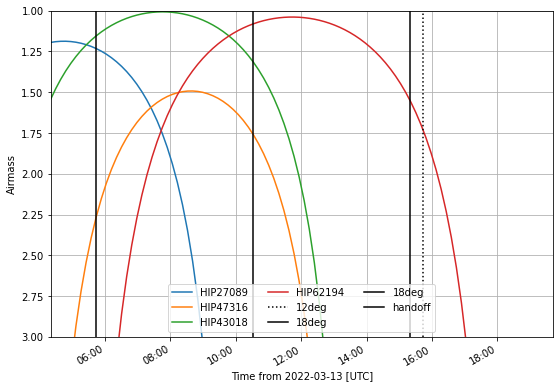

In [15]:
from astropy.utils.iers import conf
conf.auto_max_age = None
time = today+np.linspace(0, 0.32*2, 100)
plt.figure(figsize=(9,6))
for istd, istyle in zip(stds, custom_cycler):
    plots.plot_airmass(istd, observer, time, style_kwargs=istyle)
plt.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
plt.axvline(twi18deg.plot_date, label='18deg', color='k')
plt.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
plt.axvline(handoff.plot_date, label='handoff', color='k')
plt.legend(ncol=3, loc='lower center')
plt.grid()

In [17]:
chosen_stds = [HIP27089,HIP47317,HIP43018,HIP62194]

#### Targets

In [19]:
sn2021njk	= astroplan.FixedTarget(coord=SkyCoord('10:39:21.45', '-29:34:56.0', unit=(u.hourangle, u.degree)),
                                  name='2021njk')
sn2021mwj	= astroplan.FixedTarget(coord=SkyCoord('09:36:41.79', '-21:08:47.1', unit=(u.hourangle, u.degree)),
                                  name='2021mwj')
sn2021gmj	= astroplan.FixedTarget(coord=SkyCoord('10:38:47.17', '+53:30:31.0', unit=(u.hourangle, u.degree)),
                                  name='2021gmj')
sn2021adlw	= astroplan.FixedTarget(coord=SkyCoord('11:41:17.82', '+36:32:34.7', unit=(u.hourangle, u.degree)),
                                  name='2021adlw')
sn2021yok	= astroplan.FixedTarget(coord=SkyCoord('07:28:55.48', '+20:35:09.9', unit=(u.hourangle, u.degree)),
                                  name='2021yok')
sn2021njk	= astroplan.FixedTarget(coord=SkyCoord('10:39:21.45', '-29:34:56.0', unit=(u.hourangle, u.degree)),
                                  name='2021njk')
sn2021krf	= astroplan.FixedTarget(coord=SkyCoord('12:51:17.44', '+00:31:14.5', unit=(u.hourangle, u.degree)),
                                  name='2021krf')
sn2021wel	= astroplan.FixedTarget(coord=SkyCoord('16:24:39.70', '+41:01:10.6', unit=(u.hourangle, u.degree)),
                                  name='2021wel')
sn2021ont	= astroplan.FixedTarget(coord=SkyCoord('16:26:42.48', '+39:08:42.9', unit=(u.hourangle, u.degree)),
                                  name='2021ont')
sn2022abq	= astroplan.FixedTarget(coord=SkyCoord('13:22:56.79', '+28:19:09.6', unit=(u.hourangle, u.degree)),
                                  name='2022abq')
sn2022mm	= astroplan.FixedTarget(coord=SkyCoord('11:58:25.13', '-14:31:11.3', unit=(u.hourangle, u.degree)),
                                  name='2022mm')
sn2020ywx = astroplan.FixedTarget(coord=SkyCoord('11:53:26.23', '10:53:04' , unit=(u.hourangle, u.degree)),
                                  name='2020ywx')

sn2021yyg = astroplan.FixedTarget(coord=SkyCoord('05:16:21.02', '-13:28:39.9', unit=(u.hourangle, u.degree)),
                                  name='2021yyg')
sn2022crv = astroplan.FixedTarget(coord=SkyCoord('09:54:25.82', '-25:42:10.5', unit=(u.hourangle, u.degree)),
                                  name='2022crv')
sn2021adlw = astroplan.FixedTarget(coord=SkyCoord('11:41:17.82', '+36:32:34.7', unit=(u.hourangle, u.degree)),
                                  name='2021adlw')
sn2022mm = astroplan.FixedTarget(coord=SkyCoord('11:58:25.13', '-14:31:11.3', unit=(u.hourangle, u.degree)),
                                  name='2022mm')
sn2022abq = astroplan.FixedTarget(coord=SkyCoord('13:22:56.79', '+28:19:09.6', unit=(u.hourangle, u.degree)),
                                  name='2022abq')
sn2022fw = astroplan.FixedTarget(coord=SkyCoord('12:23:54.02', '-03:26:36.5', unit=(u.hourangle, u.degree)),
                                  name='2022fw')

In [20]:
targets = [sn2021yyg,	
sn2022crv,
sn2021adlw,		
sn2022abq,	
sn2022mm]#sn2019edo,sn2019cth, sn2019ein, sn2019np,, AT2019qyl, sn2018evt

#### Plot Objects for the night

/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, 

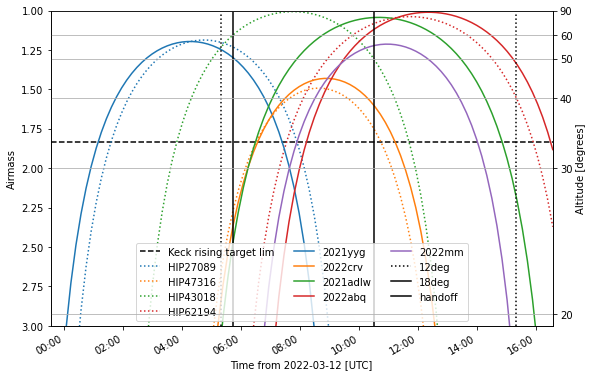

In [22]:

plt.close()
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
time = today+np.linspace(-0.2, 0.51, 100)
for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(pre_twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(twi18deg.plot_date, color='k', ls=':')
#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility.pdf')

# Make a schedule

In [ ]:
HIP43018 = astroplan.FixedTarget(coord=SkyCoord('08:45:59.26', '13:15:48.6', unit=(u.hourangle, u.degree)),
                                      name='HIP43018')
HIP53735 = astroplan.FixedTarget(coord=SkyCoord('10:59:40.21', '45:47:18.8', unit=(u.hourangle, u.degree)),
                                      name='HIP53735')
HIP62194 = astroplan.FixedTarget(coord=SkyCoord('12:44:49.03', '12:44:49.03', unit=(u.hourangle, u.degree)),
                                      name='HIP62194')
HIP59351 = astroplan.FixedTarget(coord=SkyCoord('12:10:29.55', '-17:12:35.9', unit=(u.hourangle, u.degree)),
                                      name='HIP59351')
HIP47317 = astroplan.FixedTarget(coord=SkyCoord('09:38:30.06', '-27:59:07', unit=(u.hourangle, u.degree)),
                                      name='HIP47316')
HIP27089 = astroplan.FixedTarget(coord=SkyCoord('05:44:39.22', '-12:46:36.1', unit=(u.hourangle, u.degree)),
                                 name='HIP27089')
sn2021yyg = astroplan.FixedTarget(coord=SkyCoord('05:16:21.02', '-13:28:39.9', unit=(u.hourangle, u.degree)),
                                  name='2021yyg')
sn2022crv = astroplan.FixedTarget(coord=SkyCoord('09:54:25.82', '-25:42:10.5', unit=(u.hourangle, u.degree)),
                                  name='2022crv')
sn2021adlw = astroplan.FixedTarget(coord=SkyCoord('11:41:17.82', '+36:32:34.7', unit=(u.hourangle, u.degree)),
                                  name='2021adlw')
sn2022mm = astroplan.FixedTarget(coord=SkyCoord('11:58:25.13', '-14:31:11.3', unit=(u.hourangle, u.degree)),
                                  name='2022mm')
sn2022abq = astroplan.FixedTarget(coord=SkyCoord('13:22:56.79', '+28:19:09.6', unit=(u.hourangle, u.degree)),
                                  name='2022abq')
sn2022fw = astroplan.FixedTarget(coord=SkyCoord('12:23:54.02', '-03:26:36.5', unit=(u.hourangle, u.degree)),
                                  name='2022fw')
HIP59351 = astroplan.FixedTarget(coord=SkyCoord('12:10:29.55', '-17:12:35.9', unit=(u.hourangle, u.degree)),

                                      name='HIP59351')

HIP68767 = astroplan.FixedTarget(coord=SkyCoord('14:04:30.38', '21:23:17.3', unit=(u.hourangle, u.degree)),
                                 name='HIP68767')

In [161]:
tab = """SN2021yyg    05:16:21.02    -13:28:39.9 19 8x300
HIP27089      05:44:39.22   -12:46:36.1   x     4x10
SN2021adlw    11:41:17.82    36:32:34.7   18    8x300
HIP61471      12:35:47.33  +39:41:01.3   x      4x10
SN2022crv     09:54:25.82   -25:42:10.5   16    8x150
HIP47317      09:38:30.06   -27:59:07     x     4x10
SN2022mm      11:58:25.13   -14:31:11.3   17    4x200
HIP59351      12:10:29.55   -17:12:35.9   x     4x10
SN2022abq     13:22:56.79   +28:19:09.6   17    4x200
HIP62745  12:51:23.33  +12:22:22.0   x     4x10
SN2022fw      12:23:54.02   -03:26:36.5   16    4x150
end           00:00:00.00   +00:00:00.0   11    1x1""" 
#HIP59351      12:10:29.55   -17:12:35.9   x     4x10
#HD84937 09:48:56.09 +13:44:39.3 8.3 4x10
#2021mwj	     09:36:41.79  -21:08:47.1 20-21 8x300
#2021njk	     10:39:21.45  -29:34:56.0 20.5  8x300
#Feige34      10:39:36.74  +43:06:09.3 11.3  4x60
#2022abq	     13:22:56.79  +28:19:09.6 17    4x300
#2021krf	     12:51:17.44  +00:31:14.5 20-21 8x300
#2021wel	     16:24:39.70  +41:01:10.6 20    8x300
#2021ont	     16:26:42.48  +39:08:42.9 18-19 8x300
#BD33d2642    15:51:59.86  +32:56:54.8 10.81 4x30
#2019edo  12:11:51.59   +24:08:11.2 20    1x900
#2018evt  13:46:39.21   -09:38:35.8 18.5  1x600
#2019qyl  00:54:57.53   -37:38:39.5 19    1x600
#2019hnl  23:43:10.24 -02:56:58.7   19       2x600
#2021adlw	 11:41:17.82  +36:32:34.7 18    8x300

In [162]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())

In [163]:
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [164]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64
SN2021yyg,05:16:21.02,-13:28:39.9,19,8x300,8.0,300.0
HIP27089,05:44:39.22,-12:46:36.1,x,4x10,4.0,10.0
SN2021adlw,11:41:17.82,36:32:34.7,18,8x300,8.0,300.0
HIP61471,12:35:47.33,+39:41:01.3,x,4x10,4.0,10.0
SN2022crv,09:54:25.82,-25:42:10.5,16,8x150,8.0,150.0
HIP47317,09:38:30.06,-27:59:07,x,4x10,4.0,10.0
SN2022mm,11:58:25.13,-14:31:11.3,17,4x200,4.0,200.0
HIP59351,12:10:29.55,-17:12:35.9,x,4x10,4.0,10.0
SN2022abq,13:22:56.79,+28:19:09.6,17,4x200,4.0,200.0


In [165]:
night_start = Time(pre_twi18deg.iso)
readout_time = 127*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)
tbdata['start'] = obs_start[:-1]

In [166]:
tbdata.write('../plan.txt', format='ascii.fixed_width', overwrite=True)

In [167]:
tbdata['start_time'] = Time(tbdata['start']).iso

In [168]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start,start_time
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,object,str23
SN2021yyg,05:16:21.02,-13:28:39.9,19,8x300,8.0,300.0,2022-03-13 05:43:47.792,2022-03-13 05:43:47.792
HIP27089,05:44:39.22,-12:46:36.1,x,4x10,4.0,10.0,2022-03-13 06:43:36.792,2022-03-13 06:43:36.792
SN2021adlw,11:41:17.82,36:32:34.7,18,8x300,8.0,300.0,2022-03-13 06:55:37.792,2022-03-13 06:55:37.792
HIP61471,12:35:47.33,+39:41:01.3,x,4x10,4.0,10.0,2022-03-13 07:55:26.792,2022-03-13 07:55:26.792
SN2022crv,09:54:25.82,-25:42:10.5,16,8x150,8.0,150.0,2022-03-13 08:07:27.792,2022-03-13 08:07:27.792
HIP47317,09:38:30.06,-27:59:07,x,4x10,4.0,10.0,2022-03-13 08:47:16.792,2022-03-13 08:47:16.792
SN2022mm,11:58:25.13,-14:31:11.3,17,4x200,4.0,200.0,2022-03-13 08:59:17.792,2022-03-13 08:59:17.792
HIP59351,12:10:29.55,-17:12:35.9,x,4x10,4.0,10.0,2022-03-13 09:23:58.792,2022-03-13 09:23:58.792
SN2022abq,13:22:56.79,+28:19:09.6,17,4x200,4.0,200.0,2022-03-13 09:35:59.792,2022-03-13 09:35:59.792


/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, 

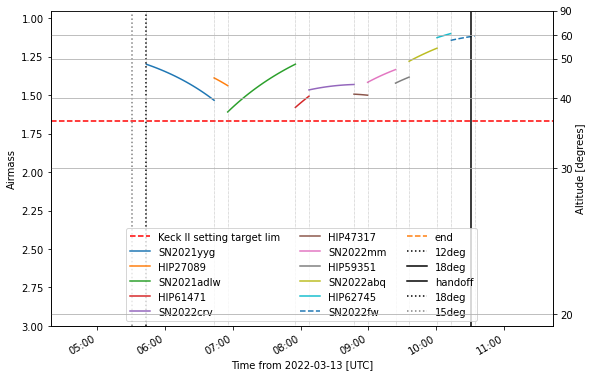

In [169]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II setting target lim')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(twi12deg-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', label='18deg', ls=':')
ax.axvline(pre_twi15deg.plot_date, color='gray', label='15deg', ls=':')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule.pdf')

In [111]:
1/np.cos(((90-18)*u.degree).to(u.radian))

<Quantity 3.23606798>

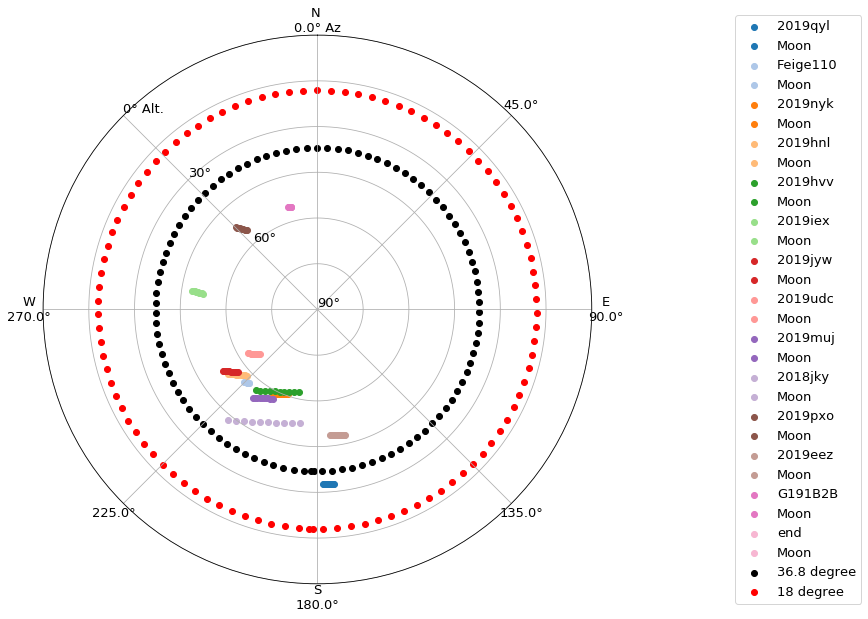

In [184]:
start_tbdata = tbdata['start']
polor_style = []
if np.size(start_tbdata) <= 10:
    for indx, cycle in enumerate(custom_cycler):
        polor_style.append(cycle)
else:
    colors = ['1f77b4','aec7e8','ff7f0e','ffbb78','2ca02c','98df8a','d62728','ff9896',
    '9467bd','c5b0d5','8c564b','c49c94','e377c2','f7b6d2','7f7f7f','c7c7c7','bcbd22','dbdb8d','17becf','9edae5']
    custom_cycler1 = cycler(linestyle=['-'])*cycler(color=colors)
    for indx, cycle in enumerate(custom_cycler1):
        polor_style.append(cycle)
observer = astroplan.Observer.at_site('keck')
#obs_end = twi12deg
obs_end = handoff
ra=tbdata['ra']
dec=tbdata['dec']
name=tbdata['name']
fig = plt.figure(figsize=(12,12))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
plt.rc('font', size=13)


for i in np.arange(np.size(start_tbdata)):
    altaz_moon = []
    if i < np.size(start_tbdata)-1:
        time_window = start_tbdata[i] + (start_tbdata[i+1]- start_tbdata[i]) * np.linspace(0, 1, 10)
        target = astroplan.FixedTarget(coord=SkyCoord(ra[i], dec[i], unit=(u.hourangle, u.degree)),
                                  name=name[i])
        moon = get_moon(start_tbdata[i])
        Moon = astroplan.FixedTarget(moon, name='Moon')
        #print ('1')
    else:
        time_window = start_tbdata[i] + (obs_end - start_tbdata[i]) * np.linspace(0, 1, 100)
        target = astroplan.FixedTarget(coord=SkyCoord(ra[i], dec[i], unit=(u.hourangle, u.degree)),
                                  name=name[i])
        moon = get_moon(start_tbdata[i])
        Moon = astroplan.FixedTarget(moon, name='Moon')
        #print ('0')

    plot_sky(target, observer, time_window, north_to_east_ccw=False, style_kwargs=polor_style[i])
    plot_sky(Moon, observer, time_window, north_to_east_ccw=False, style_kwargs=polor_style[i])

#### plot Keck II limits ###########
#### see here: https://www2.keck.hawaii.edu/inst/common/TelLimits.html ##########
location = EarthLocation.from_geodetic(0*u.deg, 90*u.deg,
                                       0*u.m)
northpole = Observer(location=location, name="northpole", timezone="US/Hawaii")
coordinates = SkyCoord('0h0m0s', '+36d48m0s', frame='icrs')
test = FixedTarget(name='36.8 degree', coord=coordinates)
start = Time('2015-06-16 06:28:40.126')
end = Time('2015-06-17 06:28:40.126')
time_window = start + (end - start) * np.linspace(0, 1, 100)
plot_sky(test, northpole, time_window, north_to_east_ccw=False, style_kwargs={'color': 'k'})

coordinates = SkyCoord('0h0m0s', '+18d0m0s', frame='icrs')
test = FixedTarget(name='18 degree', coord=coordinates)
start = Time('2015-06-16 06:28:40.126')
end = Time('2015-06-17 06:28:40.126')
time_window = start + (end - start) * np.linspace(0, 1, 100)
plot_sky(test, northpole, time_window, north_to_east_ccw=False, style_kwargs={'color': 'r'})
####################################

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))

plt.tight_layout()
#plt.show()
plt.rc('font', size=12)
plt.savefig('polar_plots.pdf')

# Backup Plan

In [ ]:
sn2019ust = astroplan.FixedTarget(coord=SkyCoord('00:54:22.42', '+31:40:12.6', unit=(u.hourangle, u.degree)),
                                  name='2019ust')
sn2019tua = astroplan.FixedTarget(coord=SkyCoord('21:58:00.29', '+24:15:56.9', unit=(u.hourangle, u.degree)),
                                  name='2019tua')
sn2019osl = astroplan.FixedTarget(coord=SkyCoord('04:38:54.33', '+18:50:10.2', unit=(u.hourangle, u.degree)),
                                  name='2019osl')
sn2019sox = astroplan.FixedTarget(coord=SkyCoord('21:31:24.76', '+02:29:39.0', unit=(u.hourangle, u.degree)),
                                  name='2019sox')

In [52]:
targets = [sn2019qyl, sn2019nyk, sn2019iex, sn2019jyw, AT2019udc, sn2019eez,
           sn2019osl, sn2019ust, sn2019tua, sn2019sox]

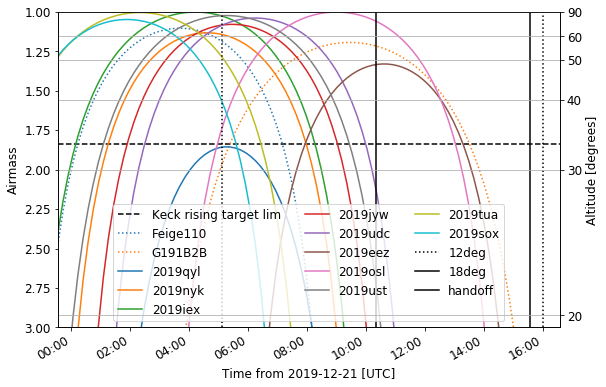

In [53]:
plt.close()
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
time = today+np.linspace(-0.2, 0.51, 100)
for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility_backup.pdf')

In [163]:
tab = """2019qyl  00:54:57.53   -37:38:39.5 19    1x600
Feige110  23:19:58.39   -05:09:55.8  11.83 1x60
2019tua  21:58:00.29   +24:15:56.9 17.5  1x300
2019nyk  00:15:15.21   -08:11:21.8 19.5  3x900
2019iex  23:51:03.61   +20:08:43.7 19    3x600
2019jyw  01:06:30.21   -02:11:56.3 19.5  3x900
2019ust  00:54:22.42   +31:40:12.6 17.5  1x300
2019udc  01:53:11.18   +04:11:46.9 19    3x600
2019osl  04:38:54.33   +18:50:10.2 19    3x600
2019eez  06:16:22.26   -21:21:35.7 19.5  3x900
G191B2B  05:05:30.60   +52:49:54.0 11.9  1x60
end      12:00:00.00   +00:00:00.0 11    1x0""" 
#
#
#
#

In [164]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())

In [165]:
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [166]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime
str10,str11,str11,str10,str10,float64,float64
2019qyl,00:54:57.53,-37:38:39.5,19,1x600,1.0,600.0
Feige110,23:19:58.39,-05:09:55.8,11.83,1x60,1.0,60.0
2019tua,21:58:00.29,+24:15:56.9,17.5,1x300,1.0,300.0
2019nyk,00:15:15.21,-08:11:21.8,19.5,3x900,3.0,900.0
2019iex,23:51:03.61,+20:08:43.7,19,3x600,3.0,600.0
2019jyw,01:06:30.21,-02:11:56.3,19.5,3x900,3.0,900.0
2019ust,00:54:22.42,+31:40:12.6,17.5,1x300,1.0,300.0
2019udc,01:53:11.18,+04:11:46.9,19,3x600,3.0,600.0
2019osl,04:38:54.33,+18:50:10.2,19,3x600,3.0,600.0


In [167]:
night_start = Time(pre_twi15deg.iso)
readout_time = 127*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)
tbdata['start'] = obs_start[:-1]

In [168]:
tbdata.write('../plan_backup.txt', format='ascii.fixed_width', overwrite=True)

In [169]:
tbdata['start_time'] = Time(tbdata['start']).iso

In [170]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start,start_time
str10,str11,str11,str10,str10,float64,float64,object,str23
2019qyl,00:54:57.53,-37:38:39.5,19,1x600,1.0,600.0,2019-12-22 04:53:10.299,2019-12-22 04:53:10.299
Feige110,23:19:58.39,-05:09:55.8,11.83,1x60,1.0,60.0,2019-12-22 05:08:10.299,2019-12-22 05:08:10.299
2019tua,21:58:00.29,+24:15:56.9,17.5,1x300,1.0,300.0,2019-12-22 05:14:10.299,2019-12-22 05:14:10.299
2019nyk,00:15:15.21,-08:11:21.8,19.5,3x900,3.0,900.0,2019-12-22 05:24:10.299,2019-12-22 05:24:10.299
2019iex,23:51:03.61,+20:08:43.7,19,3x600,3.0,600.0,2019-12-22 06:18:24.299,2019-12-22 06:18:24.299
2019jyw,01:06:30.21,-02:11:56.3,19.5,3x900,3.0,900.0,2019-12-22 06:57:38.299,2019-12-22 06:57:38.299
2019ust,00:54:22.42,+31:40:12.6,17.5,1x300,1.0,300.0,2019-12-22 07:51:52.299,2019-12-22 07:51:52.299
2019udc,01:53:11.18,+04:11:46.9,19,3x600,3.0,600.0,2019-12-22 08:01:52.299,2019-12-22 08:01:52.299
2019osl,04:38:54.33,+18:50:10.2,19,3x600,3.0,600.0,2019-12-22 08:41:06.299,2019-12-22 08:41:06.299


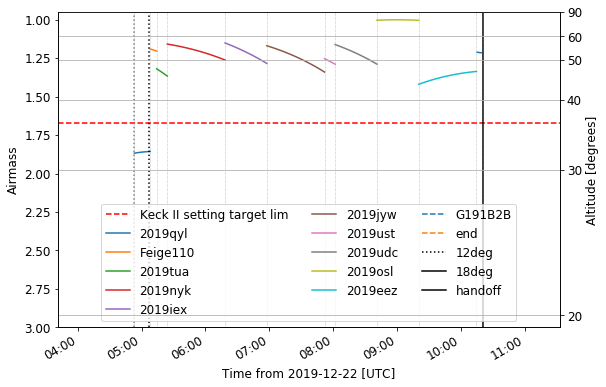

In [171]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II setting target lim')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(twi12deg-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
ax.axvline(pre_twi15deg.plot_date, color='gray', ls=':')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule_backup.pdf')

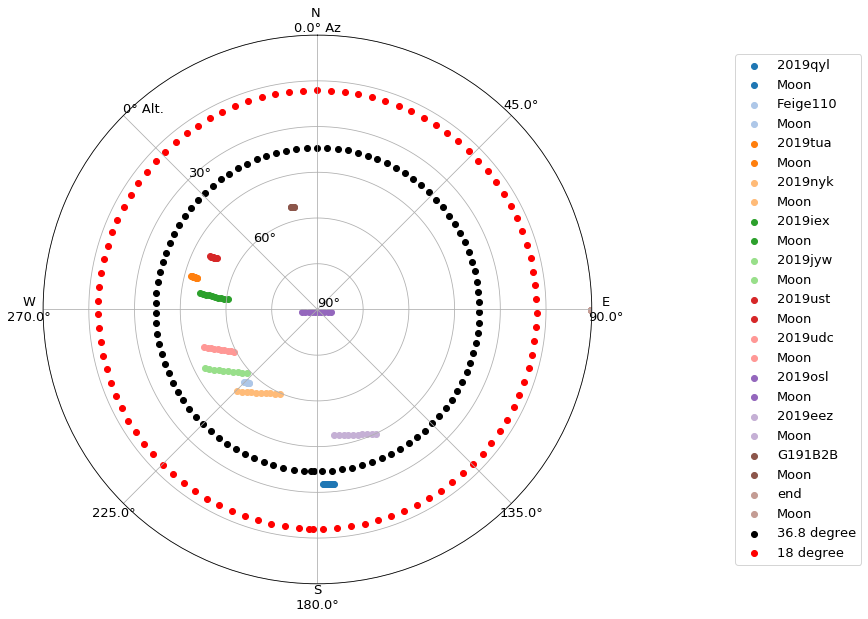

In [172]:
start_tbdata = tbdata['start']
polor_style = []
if np.size(start_tbdata) <= 10:
    for indx, cycle in enumerate(custom_cycler):
        polor_style.append(cycle)
else:
    colors = ['1f77b4','aec7e8','ff7f0e','ffbb78','2ca02c','98df8a','d62728','ff9896',
    '9467bd','c5b0d5','8c564b','c49c94','e377c2','f7b6d2','7f7f7f','c7c7c7','bcbd22','dbdb8d','17becf','9edae5']
    custom_cycler1 = cycler(linestyle=['-'])*cycler(color=colors)
    for indx, cycle in enumerate(custom_cycler1):
        polor_style.append(cycle)
observer = astroplan.Observer.at_site('keck')
#obs_end = twi12deg
obs_end = handoff
ra=tbdata['ra']
dec=tbdata['dec']
name=tbdata['name']
fig = plt.figure(figsize=(12,12))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
plt.rc('font', size=13)


for i in np.arange(np.size(start_tbdata)):
    altaz_moon = []
    if i < np.size(start_tbdata)-1:
        time_window = start_tbdata[i] + (start_tbdata[i+1]- start_tbdata[i]) * np.linspace(0, 1, 10)
        target = astroplan.FixedTarget(coord=SkyCoord(ra[i], dec[i], unit=(u.hourangle, u.degree)),
                                  name=name[i])
        moon = get_moon(start_tbdata[i])
        Moon = astroplan.FixedTarget(moon, name='Moon')
        #print ('1')
    else:
        time_window = start_tbdata[i] + (obs_end - start_tbdata[i]) * np.linspace(0, 1, 100)
        target = astroplan.FixedTarget(coord=SkyCoord(ra[i], dec[i], unit=(u.hourangle, u.degree)),
                                  name=name[i])
        moon = get_moon(start_tbdata[i])
        Moon = astroplan.FixedTarget(moon, name='Moon')

    plot_sky(target, observer, time_window, north_to_east_ccw=False, style_kwargs=polor_style[i])
    plot_sky(Moon, observer, time_window, north_to_east_ccw=False, style_kwargs=polor_style[i])

#### plot Keck II limits ###########
#### see here: https://www2.keck.hawaii.edu/inst/common/TelLimits.html ##########
location = EarthLocation.from_geodetic(0*u.deg, 90*u.deg,
                                       0*u.m)
northpole = Observer(location=location, name="northpole", timezone="US/Hawaii")
coordinates = SkyCoord('0h0m0s', '+36d48m0s', frame='icrs')
test = FixedTarget(name='36.8 degree', coord=coordinates)
start = Time('2015-06-16 06:28:40.126')
end = Time('2015-06-17 06:28:40.126')
time_window = start + (end - start) * np.linspace(0, 1, 100)
plot_sky(test, northpole, time_window, north_to_east_ccw=False, style_kwargs={'color': 'k'})

coordinates = SkyCoord('0h0m0s', '+18d0m0s', frame='icrs')
test = FixedTarget(name='18 degree', coord=coordinates)
start = Time('2015-06-16 06:28:40.126')
end = Time('2015-06-17 06:28:40.126')
time_window = start + (end - start) * np.linspace(0, 1, 100)
plot_sky(test, northpole, time_window, north_to_east_ccw=False, style_kwargs={'color': 'r'})
####################################

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))

plt.tight_layout()
#plt.show()
plt.rc('font', size=12)
plt.savefig('polar_plots_backup.pdf')

# Imaging

In [ ]:
targets = [sn2019qyl, sn2019nyk, sn2019iex, sn2019jyw, AT2019udc, sn2019eez,
           sn2019osl, sn2019ust, sn2019tua, sn2019sox]